# Pred

# imports - 1

In [2]:
!pip install numpy==1.24.3
!pip install scikit-learn==1.2.1 # Reinstall scikit-learn after installing NumPy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.1 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.1 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.7 MB/s eta 0:00:00
^C


In [2]:
import sklearn
print(sklearn.__version__)
!pip install pmdarima --no-cache-dir

1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.4 MB/s eta 0:00:00


# get data - 2

In [ ]:
# prompt: extract the data from "lab_data.db"

import sqlite3
import pandas as pd

def grab_table_data(user):
  # Connect to the database
  conn = sqlite3.connect('lab_data.db')

  # Create a cursor object
  cursor = conn.cursor()

  # Execute a query to fetch all data from a table (replace 'your_table_name' with the actual table name)
  cursor.execute("SELECT * FROM lab_results where username = 'Ben'")

  # Fetch all results
  results = cursor.fetchall()

  # Create a Pandas DataFrame from the results
  # Replace 'column1', 'column2', ... with your actual column names
  df = pd.DataFrame(results, columns=['record_time', 'username',  'glucose', 'protein',  'ph', 'specific_gravity', 'blood',
          'bilirubin', 'urobilinogen', 'ketones', 'nitrite', 'leukocytes'])

  df.drop(columns=['username', 'bilirubin', 'urobilinogen', 'ketones', 'nitrite', 'leukocytes' ], inplace=True)
  # Close the database connection
  conn.close()

  # Now you can work with the data in the DataFrame (df)
  return df

grab_table_data('Ben')

,record_time,glucose,protein,ph,specific_gravity,blood
0,2025-04-05 11:11:35,61,271,7.0,1.017,87
1,2025-04-05 11:11:36,499,185,7.0,1.005,16
2,2025-04-05 11:11:38,339,221,8.0,1.008,56
3,2025-04-05 11:11:40,75,306,7.0,1.010,43
4,2025-04-05 11:13:37,264,226,5.0,1.022,84
5,2025-04-05 11:13:40,335,151,6.0,1.024,20
6,2025-04-05 11:13:41,303,62,6.0,1.012,22
7,2025-04-05 11:13:44,308,86,9.0,1.026,51
8,2025-04-05 11:13:45,68,68,8.0,1.028,87
9,2025-04-05 11:13:46,289,372,6.0,1.010,99


# synthetic data - 2

In [3]:
import pandas as pd
import io  # Import the io module

data = """record_time,glucose,protein,ph,specific_gravity,blood
2025-04-05 11:22:54,0,0,7.4,1.03,0
2025-04-05 12:22:54,12,0,7.2,1.025,0
2025-04-05 13:22:54,20,1,6.8,1.02,0
2025-04-05 14:22:54,43,1,6.5,1.015,0
2025-04-05 15:22:54,40,2,6.3,1.01,0
2025-04-05 16:22:54,50,2,6.5,1.015,0
2025-04-05 17:22:54,40,1,6.7,1.02,0
2025-04-05 18:22:54,20,1,7.0,1.025,0
2025-04-05 19:22:54,6,0,7.3,1.03,0
2025-04-05 20:22:54,0,0,7.4,1.035,0
2025-04-05 21:22:54,75,10,6.2,1.021,5
2025-04-05 22:22:54,110,35,6.1,1.024,8
2025-04-05 23:22:54,95,28,6.0,1.027,4
2025-04-06 00:22:54,130,50,5.9,1.019,12
2025-04-06 01:22:54,140,60,5.8,1.023,15
2025-04-06 02:22:54,160,80,5.7,1.026,20
2025-04-06 03:22:54,200,100,5.6,1.018,18
2025-04-06 04:22:54,220,120,5.5,1.02,25
2025-04-06 05:22:54,180,90,5.4,1.017,10
2025-04-06 06:22:54,150,70,5.6,1.022,8
2025-04-06 07:22:54,170,65,5.7,1.024,6
2025-04-06 08:22:54,190,85,5.8,1.026,14
2025-04-06 09:22:54,210,95,5.9,1.028,16
2025-04-06 10:22:54,230,105,6.0,1.029,20
2025-04-06 11:22:54,250,115,6.1,1.03,22
2025-04-06 12:22:54,270,125,6.2,1.025,30
2025-04-06 13:22:54,290,135,6.3,1.027,32
2025-04-06 14:22:54,310,145,6.4,1.021,35
2025-04-06 15:22:54,330,155,6.5,1.023,28
2025-04-06 16:22:54,350,165,6.6,1.026,40
2025-04-06 17:22:54,370,175,6.7,1.028,45
2025-04-06 18:22:54,390,185,6.8,1.03,50
2025-04-06 19:22:54,410,195,6.9,1.022,55
2025-04-06 20:22:54,430,205,7.0,1.019,60
2025-04-06 21:22:54,450,215,7.1,1.017,65
2025-04-06 22:22:54,470,225,7.2,1.016,70
2025-04-06 23:22:54,490,235,7.3,1.015,75
2025-04-07 00:22:54,460,245,7.4,1.013,80
2025-04-07 01:22:54,440,255,7.5,1.011,85
2025-04-07 02:22:54,420,265,7.6,1.014,90
2025-04-07 03:22:54,400,275,7.7,1.016,95
2025-04-07 04:22:54,380,285,7.8,1.018,100
2025-04-07 05:22:54,360,295,7.9,1.02,95
2025-04-07 06:22:54,340,305,8.0,1.021,90
2025-04-07 07:22:54,320,315,8.1,1.023,85
2025-04-07 08:22:54,300,325,8.2,1.024,80
2025-04-07 09:22:54,280,335,8.3,1.025,75
2025-04-07 10:22:54,260,345,8.4,1.026,70
2025-04-07 11:22:54,240,355,8.5,1.027,65
2025-04-07 12:22:54,220,365,8.6,1.028,60
"""


df = pd.read_csv(io.StringIO(data)) # Use io.StringIO instead of pd.compat.StringIO
df

,record_time,glucose,protein,ph,specific_gravity,blood
0,2025-04-05 11:22:54,0,0,7.4,1.030,0
1,2025-04-05 12:22:54,12,0,7.2,1.025,0
2,2025-04-05 13:22:54,20,1,6.8,1.020,0
3,2025-04-05 14:22:54,43,1,6.5,1.015,0
4,2025-04-05 15:22:54,40,2,6.3,1.010,0
5,2025-04-05 16:22:54,50,2,6.5,1.015,0
6,2025-04-05 17:22:54,40,1,6.7,1.020,0
7,2025-04-05 18:22:54,20,1,7.0,1.025,0
8,2025-04-05 19:22:54,6,0,7.3,1.030,0
9,2025-04-05 20:22:54,0,0,7.4,1.035,0


## view data

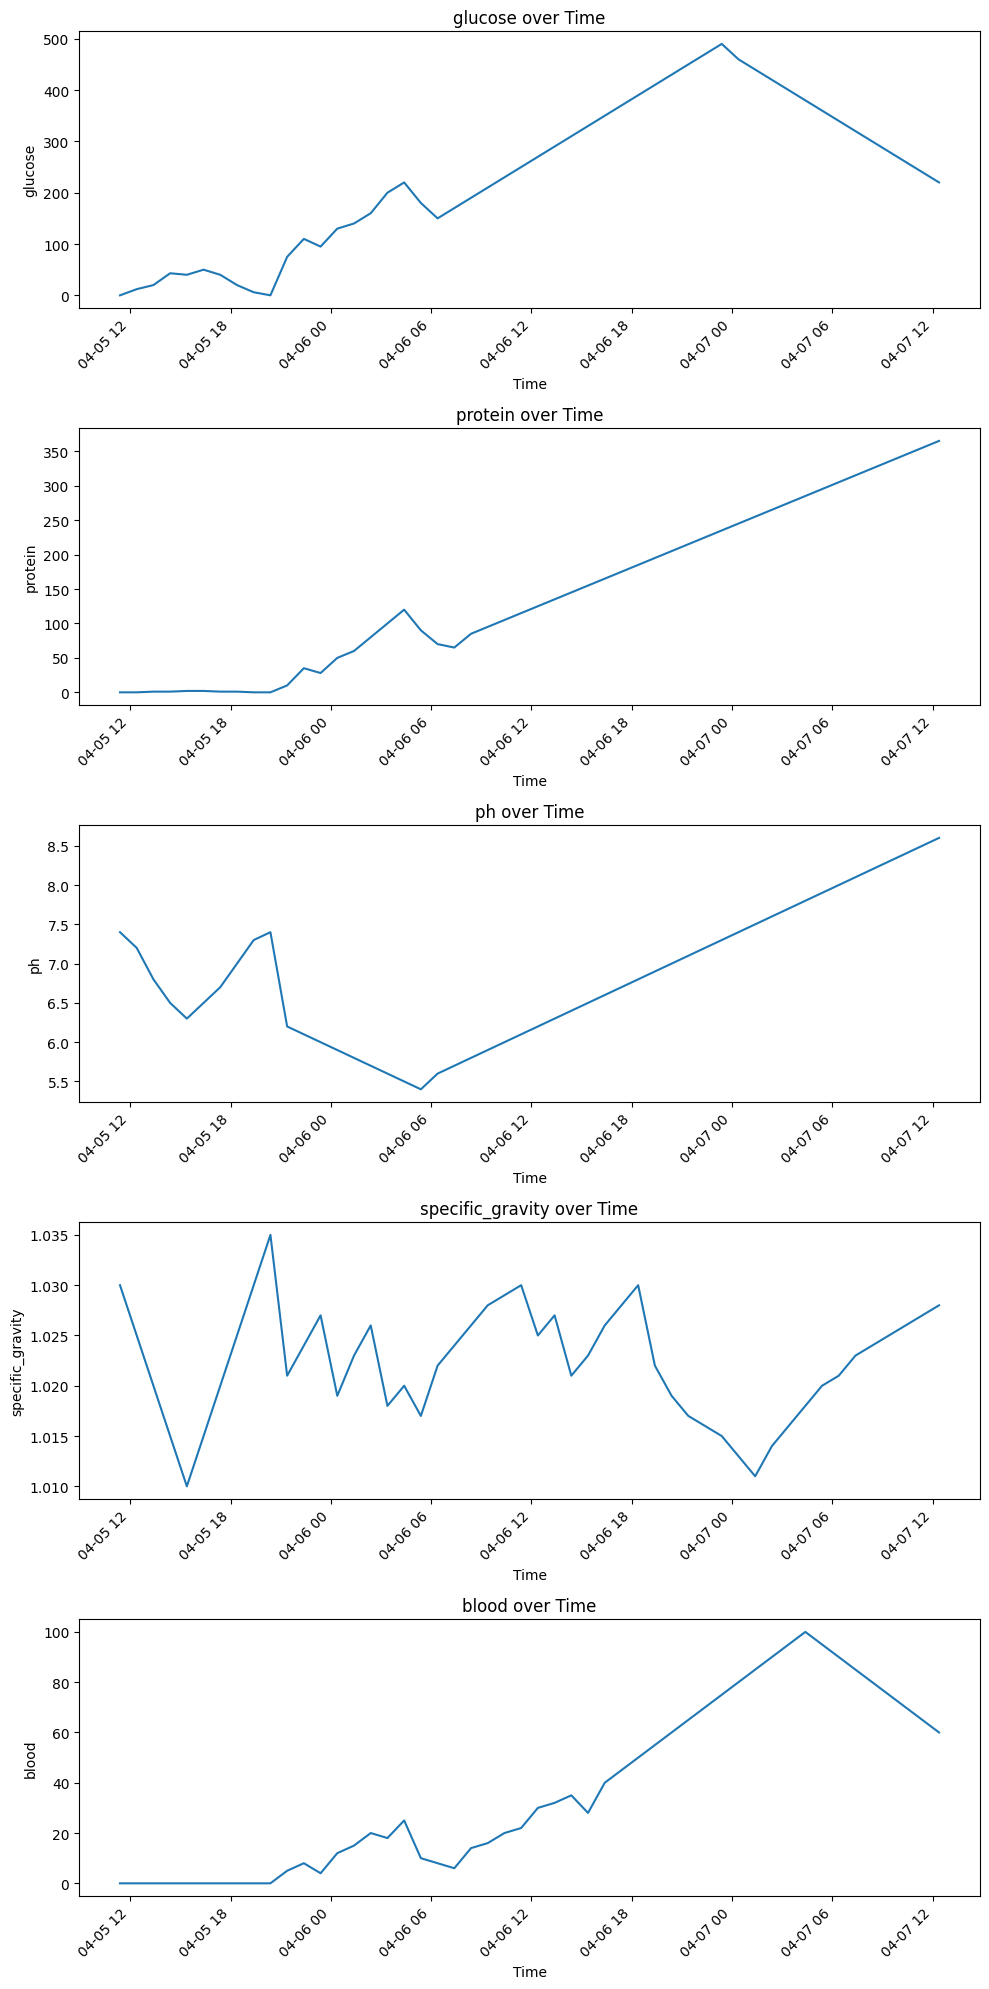

In [4]:
# prompt: plot  graphs for each of the columns against time

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert 'record_time' to datetime objects if it's not already
df['record_time'] = pd.to_datetime(df['record_time'])

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(df.columns) - 1, ncols=1, figsize=(10, 20))

# Iterate through columns and plot
for i, col in enumerate(df.columns[1:]):  # Exclude 'record_time'
    axes[i].plot(df['record_time'], df[col])
    axes[i].set_title(f'{col} over Time')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(col)
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# libraries - 3

In [5]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [6]:
def create_sliding_window(data, n_steps=5):
    """
    Create sliding window features for time series regression.

    Args:
        data (array-like): Sequence of numeric values.
        n_steps (int): Number of past steps to use as input.

    Returns:
        tuple: Feature matrix X and label vector y.
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

def auto_arima_forecast(series, n_periods=5):
    """
    Automatically fits an ARIMA model and forecasts future values.

    Args:
        series (pd.Series): Univariate time series (e.g. glucose levels).
        n_periods (int): Number of future steps to predict.

    Returns:
        list: Predicted future values.
    """
    model = pm.auto_arima(series,
                          seasonal=False,
                          stepwise=True,
                          suppress_warnings=True,
                          max_order=10,
                          trace=False)
    model.fit(series)
    forecast = model.predict(n_periods=n_periods)
    return forecast.tolist()

def train_sliding_regression_model(data, n_steps=5):
    """
    Train linear regression on sliding window features.

    Args:
        data (array-like): Sequence of numeric values.
        n_steps (int): Number of past steps used as features.

    Returns:
        model: Trained LinearRegression model.
    """
    X, y = create_sliding_window(data, n_steps)
    model = LinearRegression()
    model.fit(X, y)
    return model

def predict_next_value(model, recent_values):
    """
    Predict next value using trained model and recent values.

    Args:
        model: Trained regression model.
        recent_values (list/array): Most recent n_steps values.

    Returns:
        float: Predicted next value.
    """
    return model.predict([recent_values])[0]

def plot_with_predictions_retrained(df, n_steps=5):
    """
    Plots original data, ARIMA and regression predictions for each biomarker separately,
    retraining models before plotting.

    Args:
        df: DataFrame containing time series data.
        n_steps: Number of steps for the sliding window.
    """
    arima_preds_dict = {}
    linear_preds_dict = {}
    for col in df.columns[1:]:  # Iterate through columns (biomarkers), excluding 'record_time'
        # Split data for training and prediction
        df_train = df.iloc[:-5]
        df_last = df.iloc[-5:]

        # Train ARIMA model
        arima_model = pm.auto_arima(df_train[col], seasonal=False, stepwise=True,
                                     suppress_warnings=True, error_action="ignore",
                                     max_order=10, trace=False)
        arima_model.fit(df_train[col])
        arima_preds = arima_model.predict(n_periods=5)

        # Train Linear Regression model
        X_future, _ = create_sliding_window(df[col].values, n_steps)
        X_future = X_future[-5:]
        linear_model = train_sliding_regression_model(df_train[col].values, n_steps)
        linear_preds = linear_model.predict(X_future)

        # Plotting for this biomarker
        plt.figure(figsize=(12, 6))
        n = 15  # number of points you want
        plt.plot(df.index[-n:],df[col].iloc[-n:],label='Original Data',  color='blue')
        # plt.plot(df.index, df[col].values, label='Original Data', color='blue')
        plt.plot(df_last.index, df_last[col].values, 'o-', color='gray', label='Last 5 Actual')
        plt.plot(df_last.index, linear_preds, 'o--', color='green', label='Linear Regression Forecast')
        plt.plot(df_last.index, arima_preds, 'o--', color='orange', label='ARIMA Forecast')

        plt.title(f'Model Predictions vs Actual Data for {col}')
        plt.xlabel('Time')
        plt.ylabel(col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # add arima_preds,linear_preds for each biomarker column in a dictionary for arima  and one for linear

        arima_preds_dict[col] = arima_preds
        linear_preds_dict[col] = linear_preds

        actual = df_last[col].values

        # Evaluation metrics for ARIMA
        arima_mae = mean_absolute_error(actual, arima_preds)
        arima_mse = mean_squared_error(actual, arima_preds)
        arima_rmse = np.sqrt(arima_mse)
        arima_r2 = r2_score(actual, arima_preds)

        # Evaluation metrics for Linear Regression
        lin_mae = mean_absolute_error(actual, linear_preds)
        lin_mse = mean_squared_error(actual, linear_preds)
        lin_rmse = np.sqrt(lin_mse)
        lin_r2 = r2_score(actual, linear_preds)

        # Print results
        print(f"\n📊 Evaluation for {col}:\n")
        print(f"ARIMA -> R²: {arima_r2:.4f}, MAE: {arima_mae:.4f}, MSE: {arima_mse:.4f}, RMSE: {arima_rmse:.4f}")
        print(f"Linear -> R²: {lin_r2:.4f}, MAE: {lin_mae:.4f}, MSE: {lin_mse:.4f}, RMSE: {lin_rmse:.4f}")


    return arima_preds_dict, linear_preds_dict

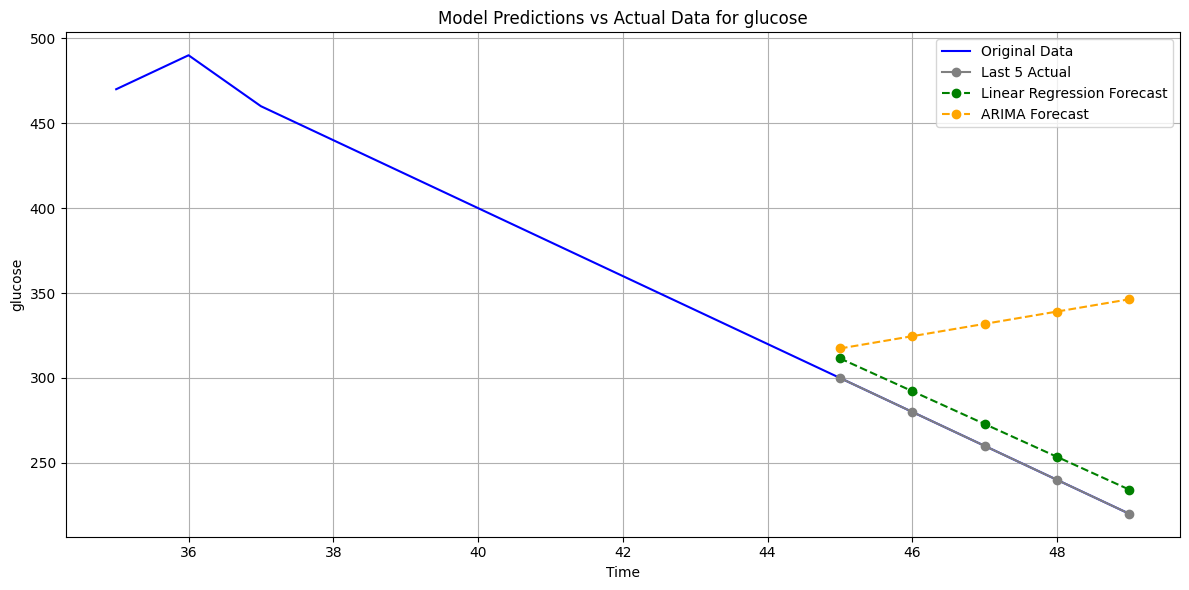


📊 Evaluation for glucose:

ARIMA -> R²: -7.3061, MAE: 71.8326, MSE: 6644.8502, RMSE: 81.5160
Linear -> R²: 0.7917, MAE: 12.8733, MSE: 166.6210, RMSE: 12.9082


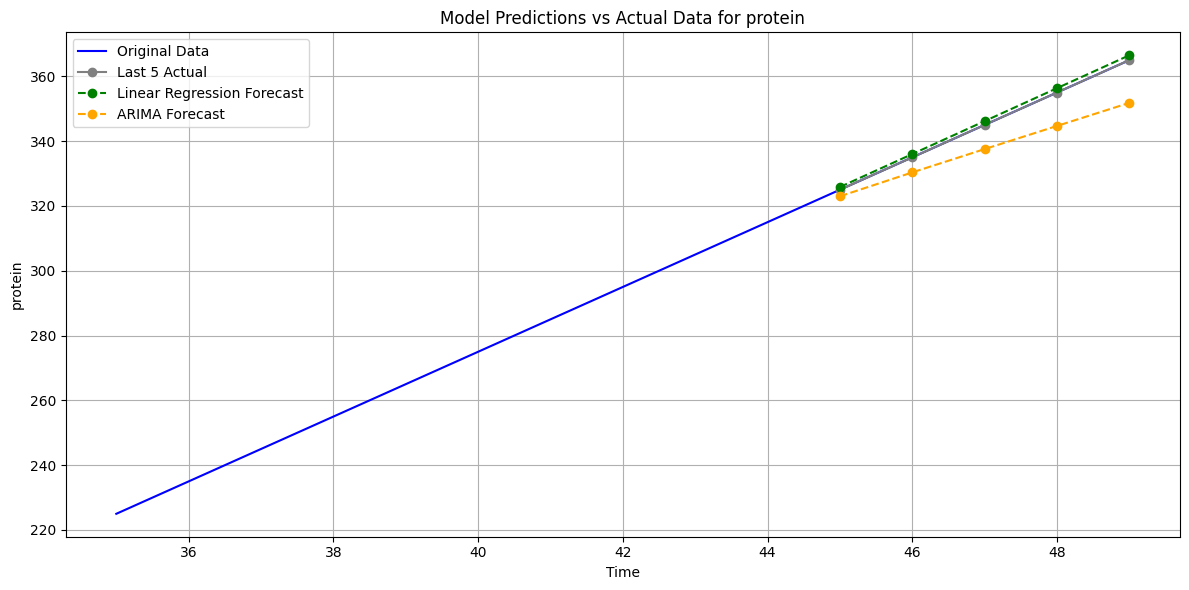


📊 Evaluation for protein:

ARIMA -> R²: 0.6387, MAE: 7.5218, MSE: 72.2520, RMSE: 8.5001
Linear -> R²: 0.9928, MAE: 1.1778, MSE: 1.4407, RMSE: 1.2003


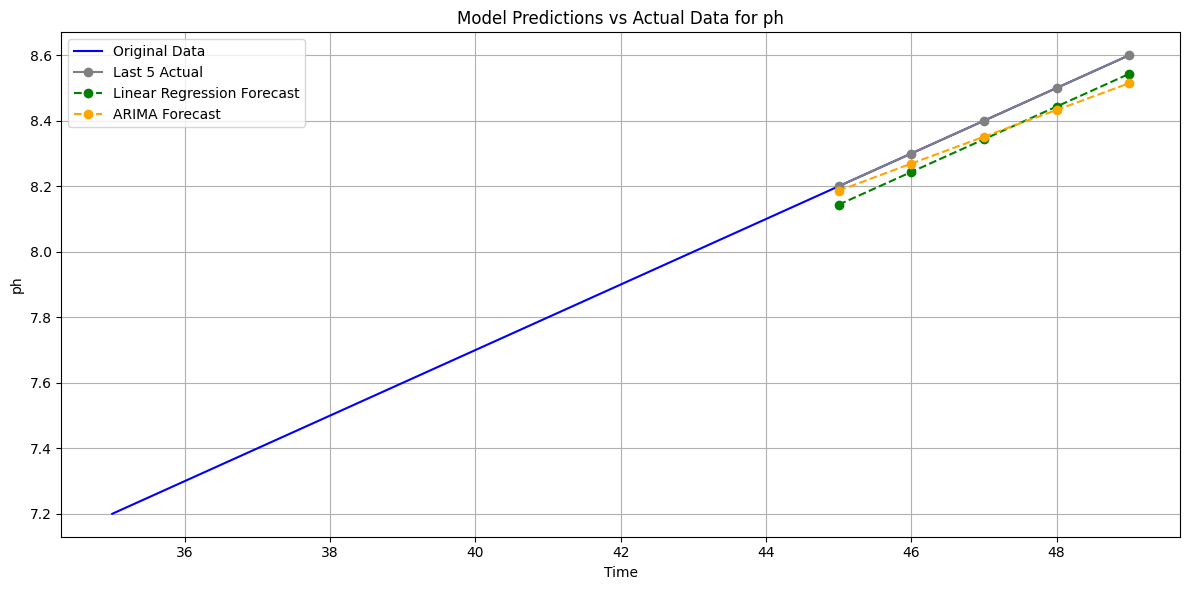


📊 Evaluation for ph:

ARIMA -> R²: 0.8470, MAE: 0.0491, MSE: 0.0031, RMSE: 0.0553
Linear -> R²: 0.8400, MAE: 0.0566, MSE: 0.0032, RMSE: 0.0566


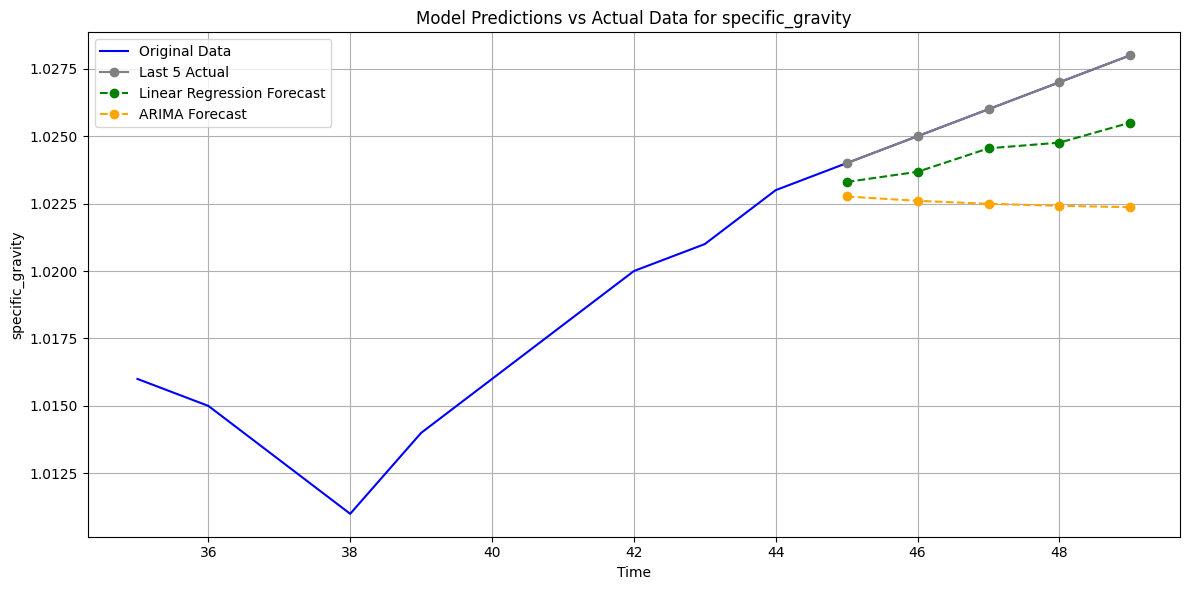


📊 Evaluation for specific_gravity:

ARIMA -> R²: -6.2289, MAE: 0.0035, MSE: 0.0000, RMSE: 0.0038
Linear -> R²: -0.5576, MAE: 0.0016, MSE: 0.0000, RMSE: 0.0018


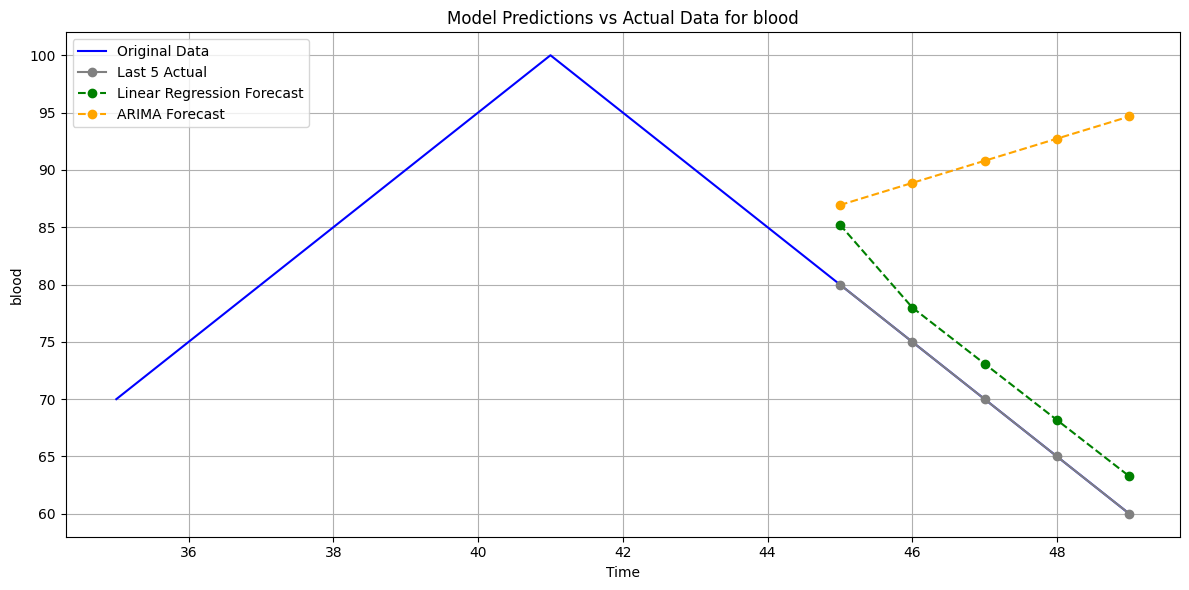


📊 Evaluation for blood:

ARIMA -> R²: -9.5710, MAE: 20.7955, MSE: 528.5511, RMSE: 22.9902
Linear -> R²: 0.7336, MAE: 3.5513, MSE: 13.3202, RMSE: 3.6497


In [7]:
arima_preds, linear_preds = plot_with_predictions_retrained(df, n_steps=5)

In [8]:
# print out actual ,arima and linear pred values for ph,glucose and protein
print(df.iloc[-5:])
print(arima_preds)
print(linear_preds)

           record_time  glucose  protein   ph  specific_gravity  blood
45 2025-04-07 08:22:54      300      325  8.2             1.024     80
46 2025-04-07 09:22:54      280      335  8.3             1.025     75
47 2025-04-07 10:22:54      260      345  8.4             1.026     70
48 2025-04-07 11:22:54      240      355  8.5             1.027     65
49 2025-04-07 12:22:54      220      365  8.6             1.028     60
{'glucose': 45    317.336174
46    324.584381
47    331.832588
48    339.080794
49    346.329001
dtype: float64, 'protein': 45    322.979439
46    330.354942
47    337.549933
48    344.690968
49    351.815877
dtype: float64, 'ph': 45    8.186407
46    8.269276
47    8.351223
48    8.432931
49    8.514576
dtype: float64, 'specific_gravity': 45    1.022764
46    1.022603
47    1.022493
48    1.022418
49    1.022367
dtype: float64, 'blood': 45    86.931818
46    88.863636
47    90.795455
48    92.727273
49    94.659091
dtype: float64}
{'glucose': array([311.53223793, 292

# Linear Regression Only

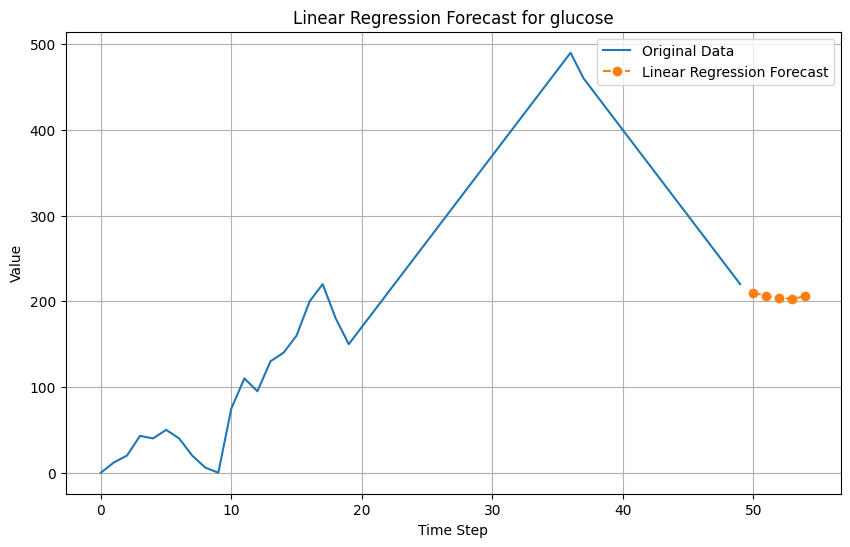

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def train_and_plot_linear_regression(df_column, n_steps=5):
    """
    Trains a linear regression model on a single DataFrame column using a sliding window
    and plots the original data along with future predictions.
    """

    def create_sliding_window(data, n_steps):
        X, y = [], []
        for i in range(len(data) - n_steps):
            X.append(data[i:i + n_steps])
            y.append(data[i + n_steps])
        return np.array(X), np.array(y)

    data = df_column.values
    X, y = create_sliding_window(data, n_steps)
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values
    future_values = []
    last_window = data[-n_steps:]
    for _ in range(5):  # Predicting the next 5 values
        next_value = model.predict([last_window])[0]
        future_values.append(next_value)
        last_window = np.roll(last_window, -1)
        last_window[-1] = next_value

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_column.index, df_column.values, label='Original Data')
    future_index = range(len(df_column), len(df_column) + len(future_values))
    plt.plot(future_index, future_values, label='Linear Regression Forecast', marker='o', linestyle='--')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(f'Linear Regression Forecast for {df_column.name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (assuming 'df' is your DataFrame and 'glucose' is the column name)
# Replace 'glucose' with the actual name of your column
train_and_plot_linear_regression(df['glucose'])
